In [3]:
!pip install opencv-python
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 2.1 MB/s eta 0:00:00m eta 0:00:010:00:010m


2024-01-28 21:45:58.853766: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 41s 0us/step


In [5]:
data_dir

'./datasets/flower_photos'

In [6]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [8]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/5086249859_d066b37b8a_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2973256732_1926295f35.jpg'),
 PosixPath('datasets/flower_photos/roses/3475572132_01ae28e834_n.jpg'),
 PosixPath('datasets/flower_photos/roses/22385375599_1faf334f5d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3634244527_e72c47842c_n.jpg')]

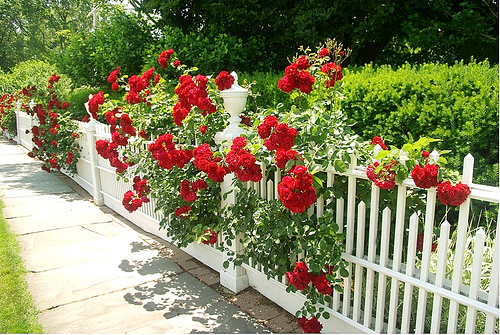

In [12]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

In [14]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [16]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [18]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/5086249859_d066b37b8a_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2973256732_1926295f35.jpg'),
 PosixPath('datasets/flower_photos/roses/3475572132_01ae28e834_n.jpg'),
 PosixPath('datasets/flower_photos/roses/22385375599_1faf334f5d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3634244527_e72c47842c_n.jpg')]

In [19]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/5086249859_d066b37b8a_m.jpg'

In [20]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [21]:
img.shape

(240, 240, 3)

In [22]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [24]:
x,y = [],[]

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [28]:
x = np.array(x)
y = np.array(y)

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [32]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [35]:


num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train_scaled, y_train, epochs=30)              

Epoch 1/30
86/86 [==============================] - 15s 172ms/step - loss: 1.3301 - accuracy: 0.4360
Epoch 2/30
86/86 [==============================] - 15s 176ms/step - loss: 0.9812 - accuracy: 0.6148
Epoch 3/30
86/86 [==============================] - 15s 174ms/step - loss: 0.7988 - accuracy: 0.7006
Epoch 4/30
86/86 [==============================] - 15s 176ms/step - loss: 0.5883 - accuracy: 0.7827
Epoch 5/30
86/86 [==============================] - 15s 180ms/step - loss: 0.3975 - accuracy: 0.8666
Epoch 6/30
86/86 [==============================] - 14s 163ms/step - loss: 0.2401 - accuracy: 0.9153
Epoch 7/30
86/86 [==============================] - 15s 174ms/step - loss: 0.1510 - accuracy: 0.9517
Epoch 8/30
86/86 [==============================] - 15s 176ms/step - loss: 0.0974 - accuracy: 0.9735
Epoch 9/30
86/86 [==============================] - 15s 175ms/step - loss: 0.0443 - accuracy: 0.9906
Epoch 10/30
86/86 [==============================] - 15s 174ms/step - loss: 0.0479 - accura

In [37]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 2s 56ms/step - loss: 3.6424 - accuracy: 0.6068


[3.6424190998077393, 0.6067538261413574]

In [39]:
predictions = model.predict(x_test_scaled)
predictions

29/29 [==============================] - 2s 53ms/step


array([[  0.6273329 ,  36.476185  ,  14.753399  ,  -3.8718648 ,
         -6.5870323 ],
       [  1.565092  ,   7.1728244 ,  14.712705  ,  -5.334493  ,
        -10.478612  ],
       [-11.501556  ,  -5.9401383 ,  11.364684  ,   1.9765998 ,
          1.6392195 ],
       ...,
       [-12.380699  ,  -5.758849  ,  10.13511   ,  34.151646  ,
          9.678519  ],
       [ 16.304283  ,   3.8349323 , -14.151837  , -14.132977  ,
         -0.9569981 ],
       [-18.697271  , -13.068918  ,   3.3464954 ,  19.900846  ,
          0.65291953]], dtype=float32)

In [41]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([2.6980014e-16, 1.0000000e+00, 3.6805603e-10, 2.9996106e-18,
       1.9855572e-19], dtype=float32)>

In [43]:
np.argmax(score)

1

In [44]:
y_test[0]

1

In [47]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

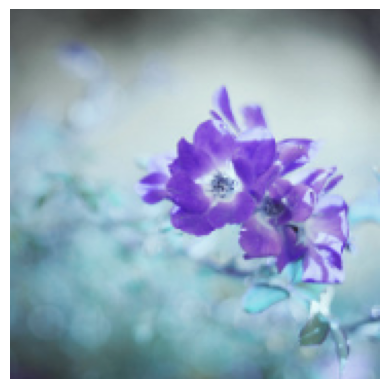

In [49]:
plt.axis('off')
plt.imshow(x[0])

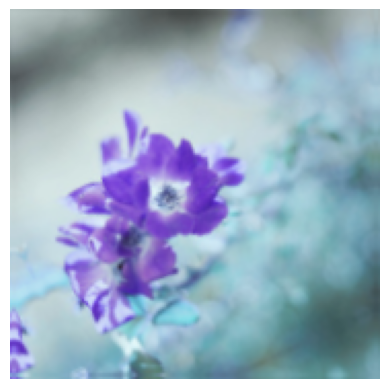

In [52]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

In [54]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train_scaled, y_train, epochs=25) 

Epoch 1/25
86/86 [==============================] - 18s 191ms/step - loss: 1.3025 - accuracy: 0.4328
Epoch 2/25
86/86 [==============================] - 16s 187ms/step - loss: 1.0129 - accuracy: 0.6014
Epoch 3/25
86/86 [==============================] - 16s 188ms/step - loss: 0.9388 - accuracy: 0.6384
Epoch 4/25
86/86 [==============================] - 16s 187ms/step - loss: 0.8731 - accuracy: 0.6559
Epoch 5/25
86/86 [==============================] - 16s 190ms/step - loss: 0.8152 - accuracy: 0.6839
Epoch 6/25
86/86 [==============================] - 16s 187ms/step - loss: 0.7491 - accuracy: 0.7129
Epoch 7/25
86/86 [==============================] - 16s 188ms/step - loss: 0.7021 - accuracy: 0.7275
Epoch 8/25
86/86 [==============================] - 16s 188ms/step - loss: 0.7003 - accuracy: 0.7297
Epoch 9/25
86/86 [==============================] - 16s 189ms/step - loss: 0.6383 - accuracy: 0.7544
Epoch 10/25
86/86 [==============================] - 16s 191ms/step - loss: 0.6274 - accura

In [56]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 2s 57ms/step - loss: 0.9774 - accuracy: 0.7375


[0.9773586988449097, 0.7374727725982666]